# Introduzione

In questo caso vogliamo fittare la funzione:
$$
f(x,y) = \sin(x^2+y^2)
$$
con $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$. Seguiamo lo stesso schema del punto precedente.

In [1]:
import matplotlib as cm
import matplotlib.pyplot as plt
import numpy as np
import math
import string
from scipy.optimize import curve_fit
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stat
import pandas as pd
import subprocess as sb
from os import system
import os
import shutil
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

sns.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)

In [3]:
def func(x,y):
    return np.sin(x**2+y**2)

x1_predicted = np.random.uniform(-1.5, 1.5, 1000)
x2_predicted = np.random.uniform(-1.5, 1.5, 1000)
array_to_predicted = np.transpose(np.array([x1_predicted, x2_predicted]))

In [5]:
def machine_learning(activation, n_epochs, n_train, n_layers, n_neurons, optimizer, loss):
    
    np.random.seed(0)
    x1_train = np.random.uniform(-1.5, 1.5, n_train)
    x2_train = np.random.uniform(-1.5, 1.5, n_train)
    x1_valid = np.random.uniform(-1.5, 1.5, 200)
    x2_valid = np.random.uniform(-1.5, 1.5, 200)
    x1_valid.sort()
    x2_valid.sort()
    y_target = func(x1_valid, x2_valid) # ideal (target) linear function
    sigma = 0.2 # noise standard deviation, for the moment it is absent
    y_train = np.random.normal(func(x1_train, x2_train), sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(func(x1_valid, x2_valid), sigma)

    model = keras.models.Sequential()

    # 1 layer
    model.add(keras.layers.Dense(
        n_neurons,
        activation=activation,
        input_shape=(2,),
        kernel_initializer=keras.initializers.RandomNormal(stddev=1),
        bias_initializer=keras.initializers.RandomNormal(stddev=1)))

    # layer nascosti
    for r in range(1, n_layers):
        model.add(keras.layers.Dense(
            n_neurons,
            activation=activation,
            kernel_initializer=keras.initializers.RandomNormal(stddev=1),
            bias_initializer=keras.initializers.RandomNormal(stddev=1)))

    # layer finale
    model.add(keras.layers.Dense(
            1,
            activation=activation,
            kernel_initializer=keras.initializers.RandomNormal(stddev=1),
            bias_initializer=keras.initializers.RandomNormal(stddev=1)))  

    model.compile(
        loss=loss,
        optimizer=optimizer,
        metrics=['mse']
    )

    array_to_train = np.transpose(np.array([x1_train, x2_train]))
    array_to_valid = np.transpose(np.array([x1_valid, x2_valid]))


    history = model.fit(x=array_to_train, y=y_train, 
                batch_size=32, epochs=n_epochs,
                verbose=0,
                validation_data=(array_to_valid, y_valid),
                shuffle=True)
                                                    
                
    return model, history

## 1. Funzione di attivazione

Per identificare quale sia la migliore funzione di attivazione, proviamo sia funzioni open-bounded che funzioni con plateu.

In [6]:
activation = ['tanh','sigmoid','softsign', 'elu', 'relu','selu','gelu']
n_epochs = [200]
n_train = [1500]
n_neuron = [10]
n_layer = [5]
optimizer = ['sgd']
loss = ['mse']

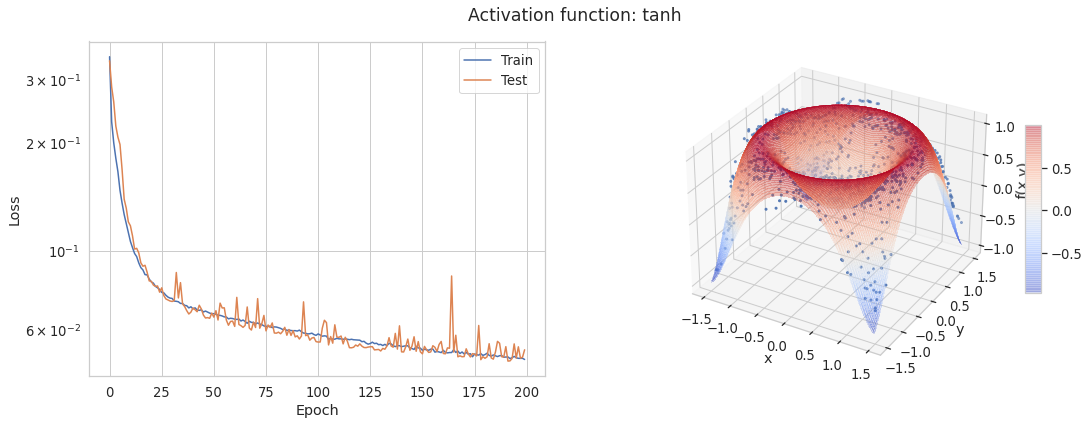

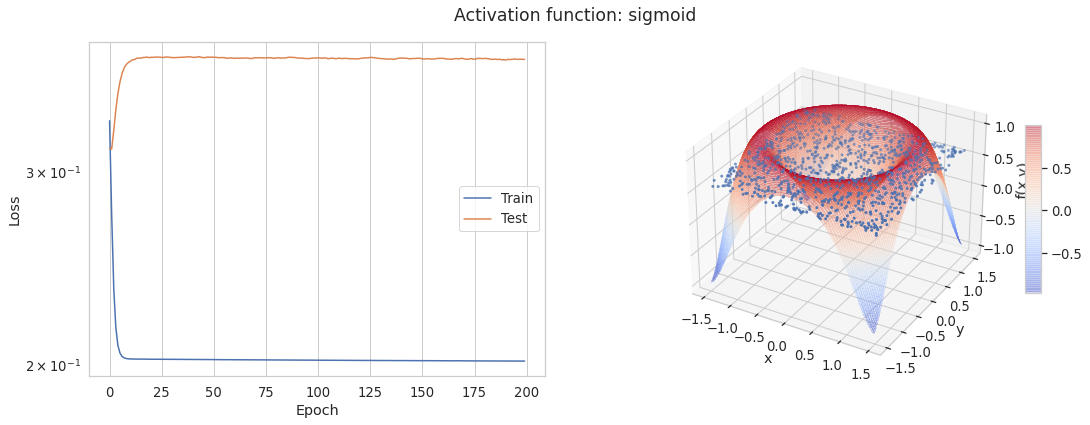

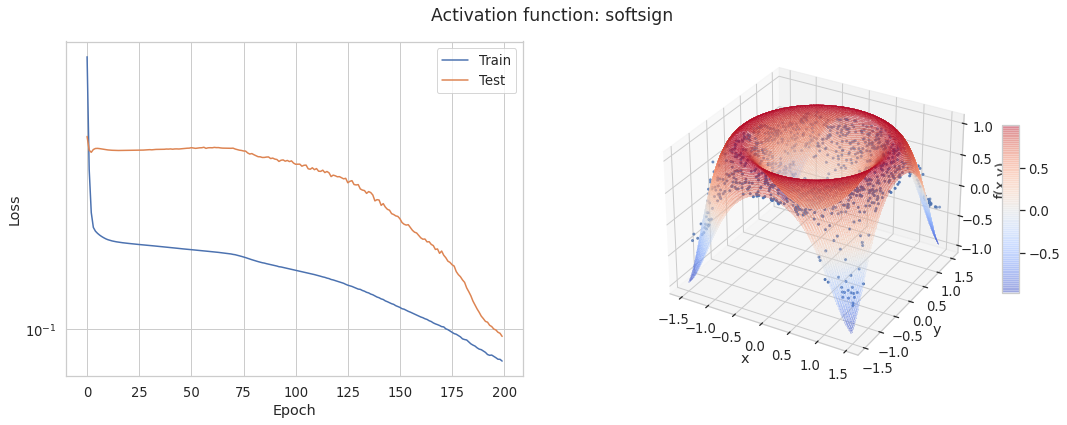

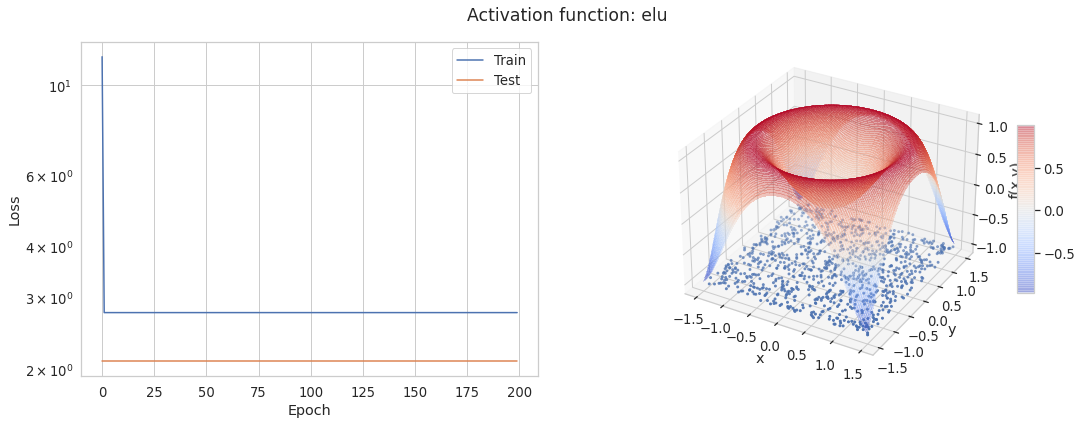

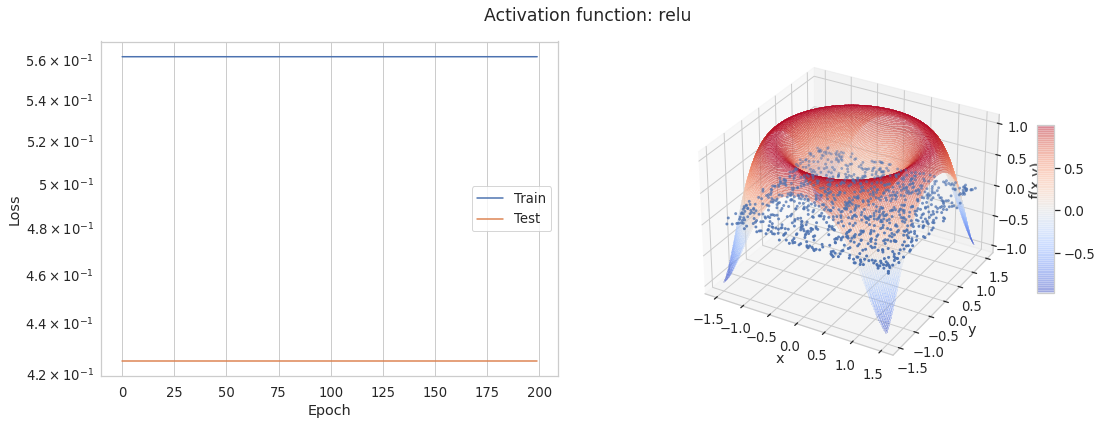

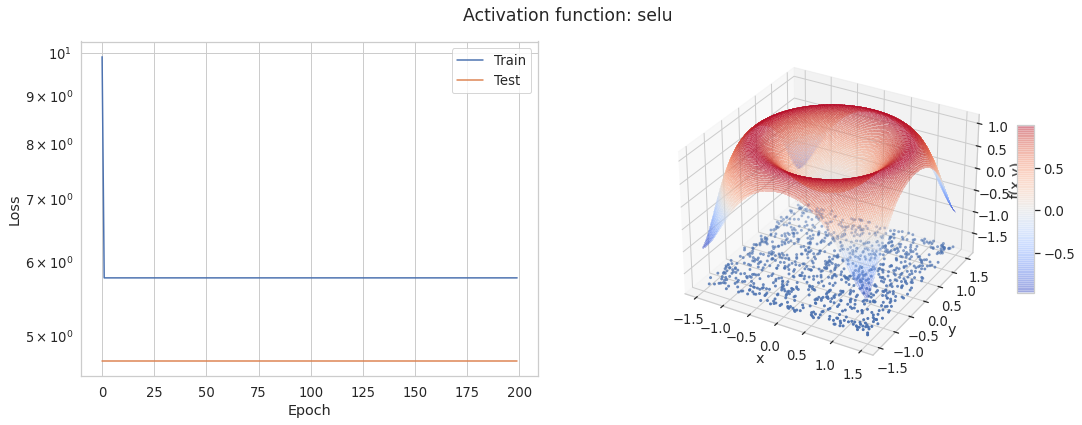

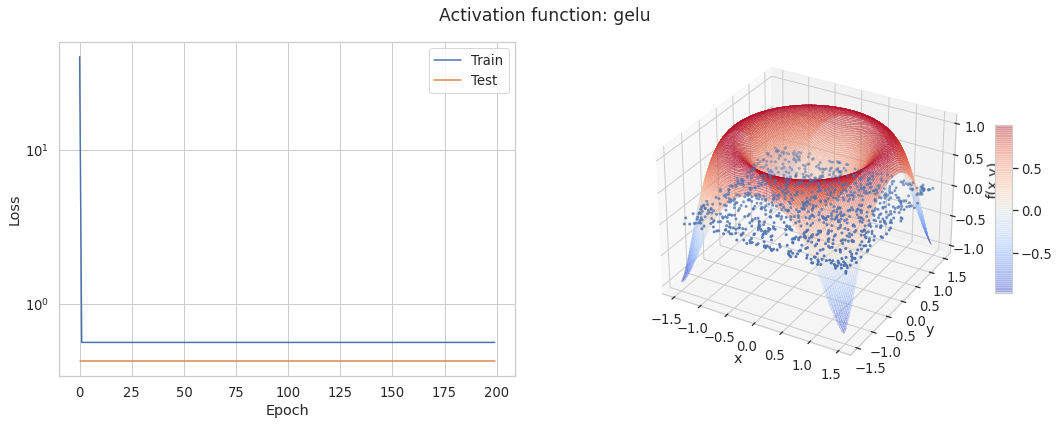

In [7]:
m=0
for i in activation:
    
    model, history = machine_learning(i, n_epochs[0], n_train[0] , n_layer[0], n_neuron[0], optimizer[0], loss[0])
    fig = plt.figure(figsize=(18,6))
    plt.suptitle('Activation function: '+str(i))
    fig.subplots_adjust(top=0.9)
    k=0
    m=m+1

    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.set_yscale('log')
    ax.legend(['Train', 'Test'], loc='best')

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    X = np.arange(-1.5, 1.5, 0.02)
    Y = np.arange(-1.5, 1.5, 0.02)
    X, Y = np.meshgrid( X,  Y)
    R = X**2 + Y**2
    Z = np.sin(R)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm',
                           linewidth=0, antialiased=False, alpha=0.2)
    
    ax.scatter(x1_predicted,x2_predicted, model.predict(array_to_predicted), marker='o', s=4)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(r'f(x,y)')
    fig.colorbar(surf, shrink=0.5, aspect=10)


>L'unica funzione che sembra adatta è la funzione **tanh**

## 2. Numero di epoche e di train



Vogliamo ora identificare quale sia il numero ottimale di valori di trainig e di epoche da fornire all'algoritmo. Chiaramente il risultato che otteniamo dipende fortemente dalla scelta del numero di neuroni e di layer. Infatti aumentando $N_{neurons}$ e $N_{layer}$ aumentiamo il numero di parametri da ottimizzare. Tuttavia siamo interessati ad una stima approssimativa per un numero intermedio di $N_{neurons}$ e $N_{layer}$ e quindi scegliamo le stesse condizioni del caso precedente.

In [17]:
activation = ['tanh']
n_epochs = [100,200,500]
n_train = [500, 1000, 1500, 2000]
n_neuron = [10]
n_layer = [5]
optimizer = ['sgd']
loss = ['mse']

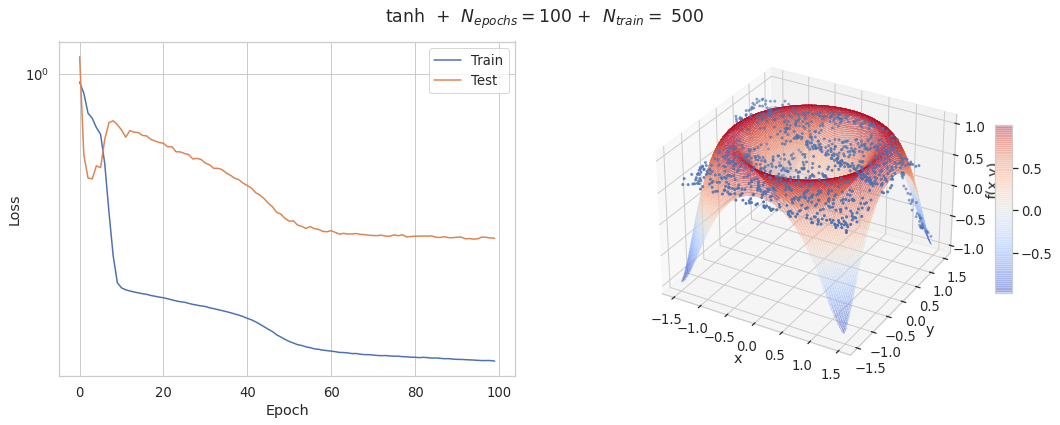

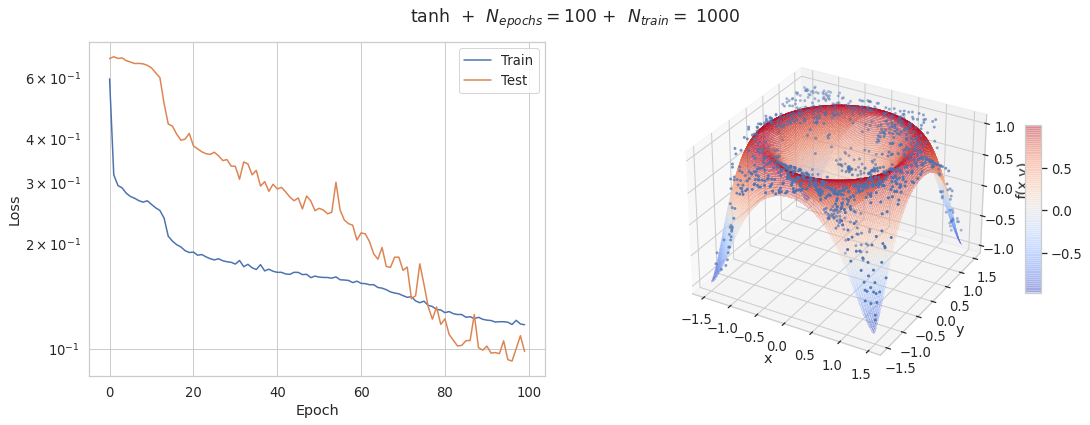

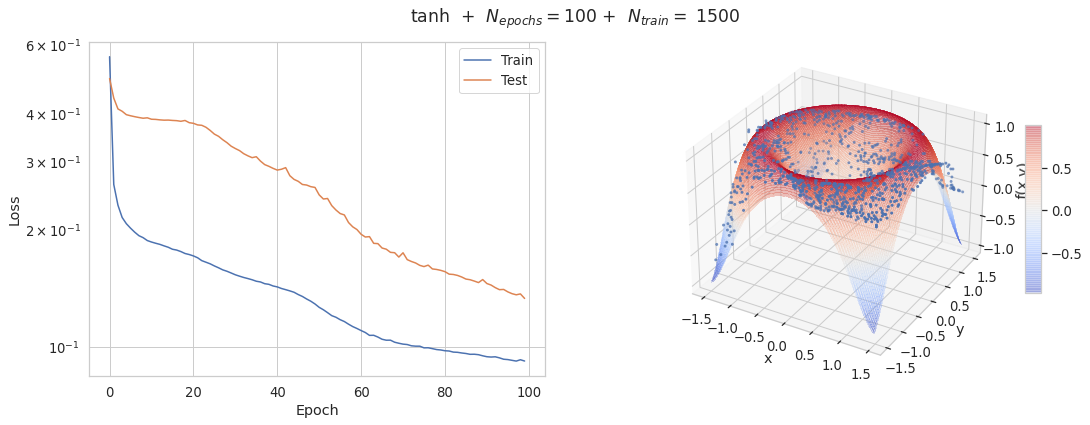

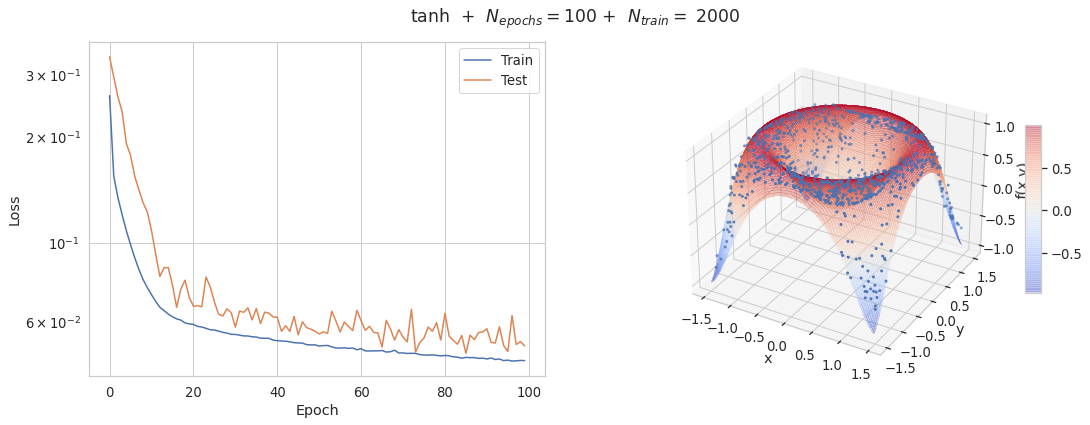

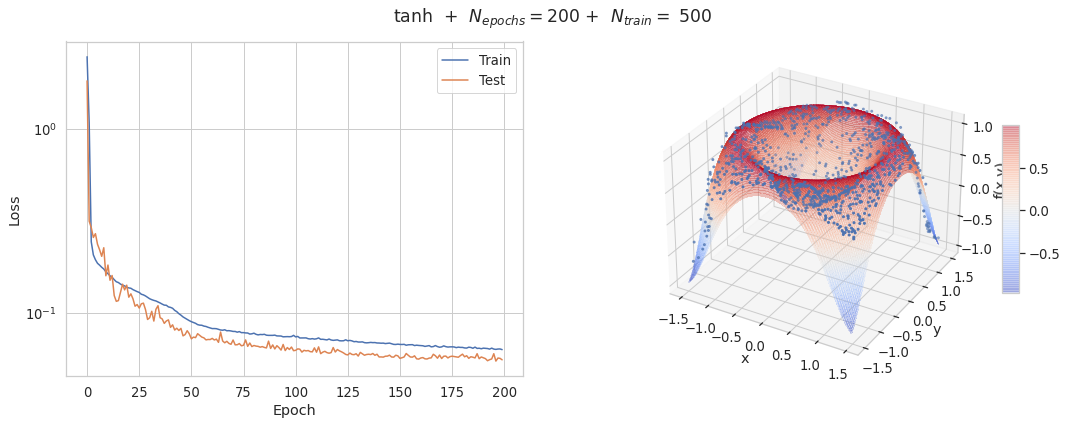

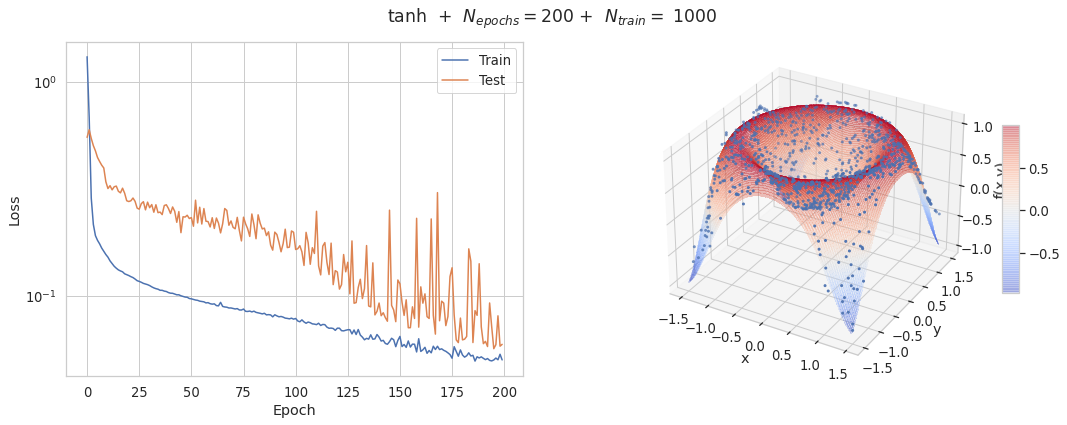

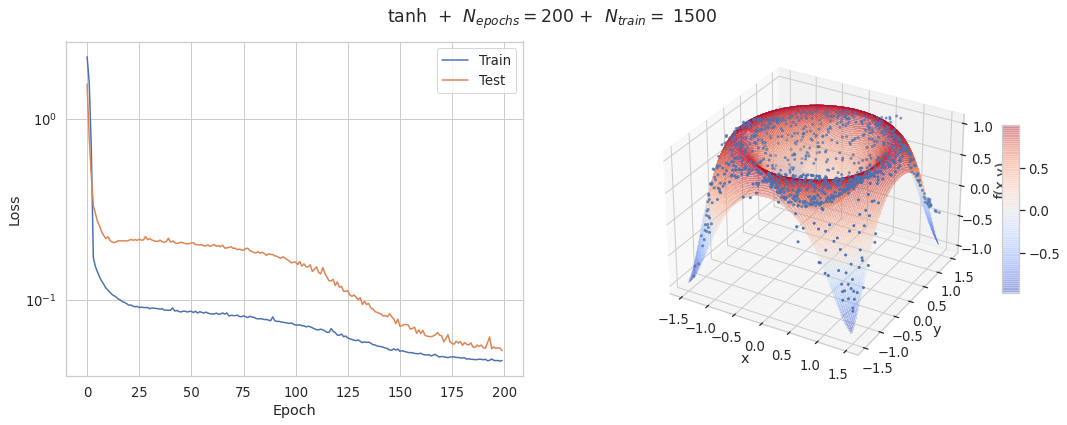

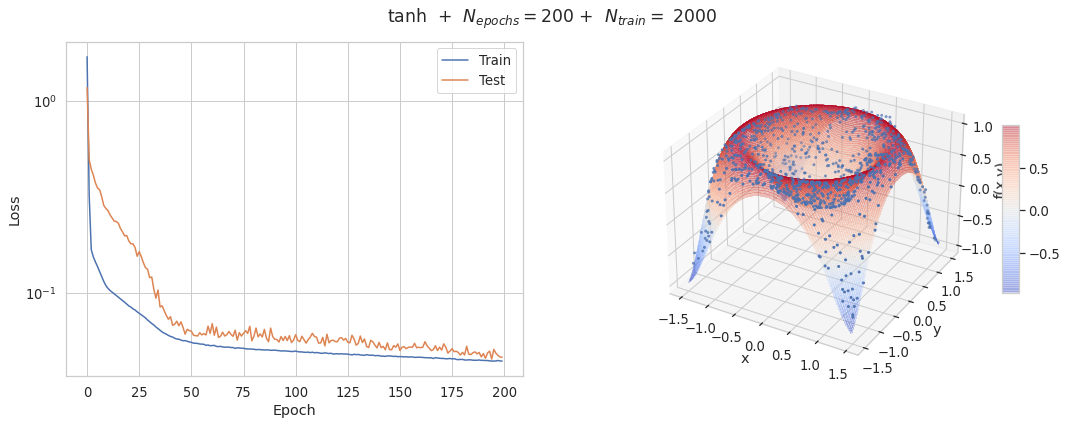

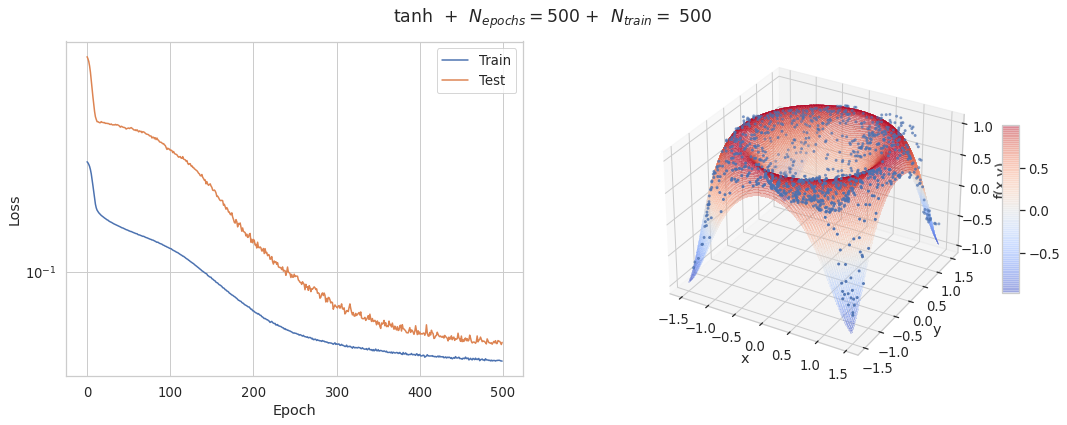

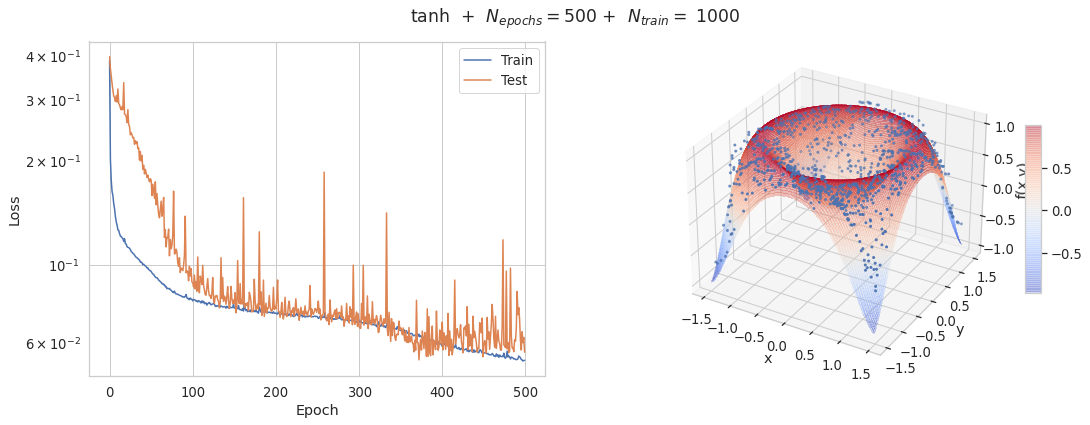

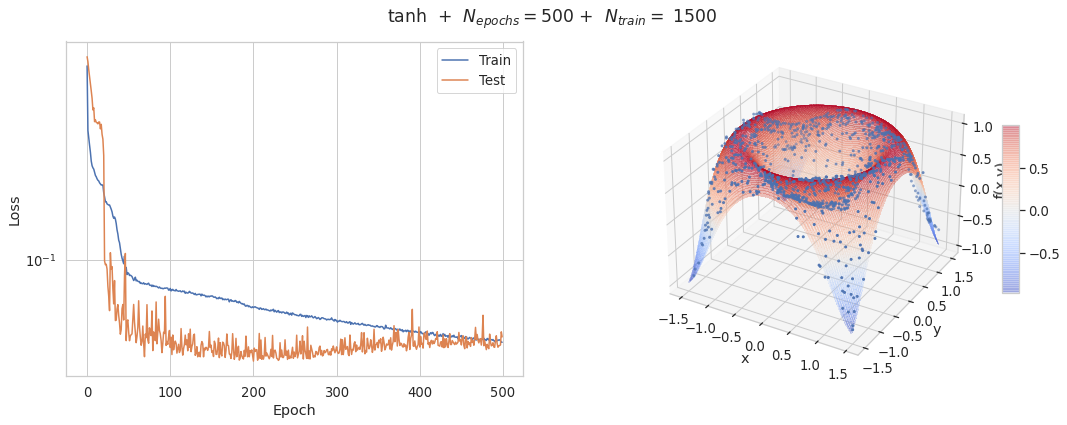

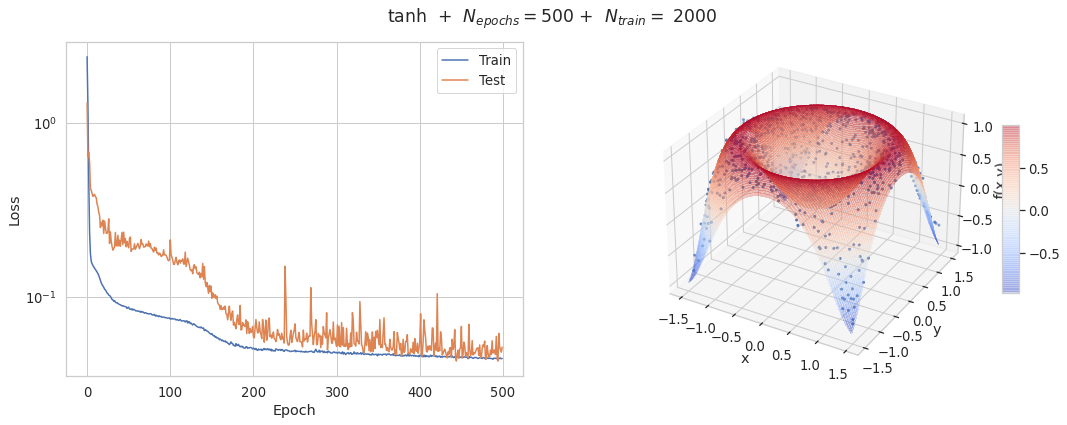

In [18]:
m=0
for q in activation:
    for i in n_epochs:
        for j in n_train:
            model, history = machine_learning(q, i, j , n_layer[0], n_neuron[0], optimizer[0], loss[0])
            fig = plt.figure(figsize=(18,6))
            plt.suptitle(str(q)+r'  +  $N_{epochs}=$'+str(i)+r' +  $N_{train}=$ '+str(j))
            fig.subplots_adjust(top=0.9)            
    
            ax = fig.add_subplot(1, 2, 1)
            ax.plot(history.history['loss'])
            ax.plot(history.history['val_loss'])
            ax.set_ylabel('Loss')
            ax.set_xlabel('Epoch')
            ax.set_yscale('log')
            ax.legend(['Train', 'Test'], loc='best')

            ax = fig.add_subplot(1, 2, 2, projection='3d')
            X = np.arange(-1.5, 1.5, 0.02)
            Y = np.arange(-1.5, 1.5, 0.02)
            X, Y = np.meshgrid( X,  Y)
            R = X**2 + Y**2
            Z = np.sin(R)
            surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm',
                                   linewidth=0, antialiased=False, alpha=0.2)
          
            ax.scatter(x1_predicted,x2_predicted, model.predict(array_to_predicted), marker='o', s=4)
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel(r'f(x,y)')
            fig.colorbar(surf, shrink=0.5, aspect=10)
    

Da questa analisi osserviamo che il fit converge con quasi tutti i valori di $N_{epochs}$ e $N_{train}$.
Tuttavia la configurazione ottimale della rete sembra essere: 

$$ \boxed{\text{Funzione di attivazione: tanh} \quad \quad N_{epochs} = 200 \quad \quad N_{train} = 200}$$


## 3. Numero di layer e neuroni

Ora cerchiamo quale sia il numero ottimale di layers e di neuroni avendo già fissato $N_{epochs}$ e $N_{train}$. In particolare scegliamo di lavorare con $2\leq N_{layers}\leq 8$ e $5 \leq N_{neurons} \leq 20$.

In [19]:
activation = ['tanh']
n_epochs = [200]
n_train = [2000]
n_neuron = [5,10,15,20]
n_layer = [2,4,6,8]
optimizer = ['sgd']
loss = ['mse']

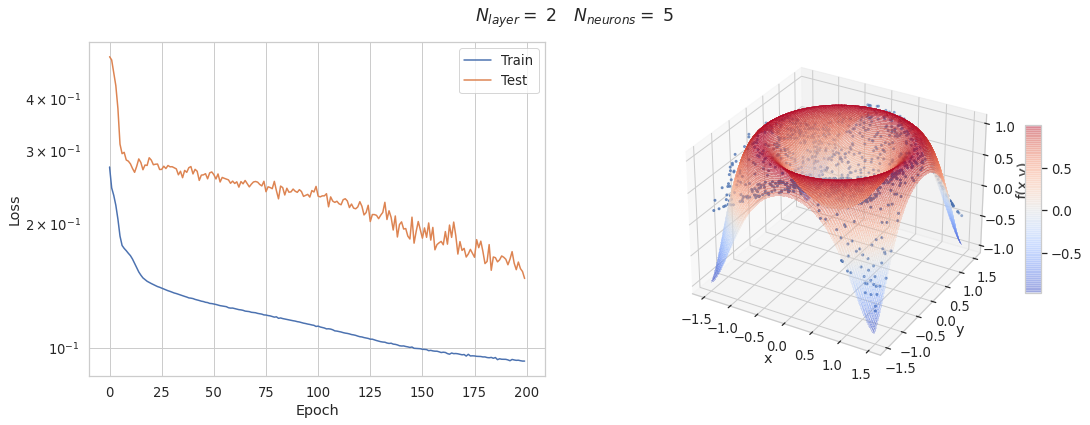

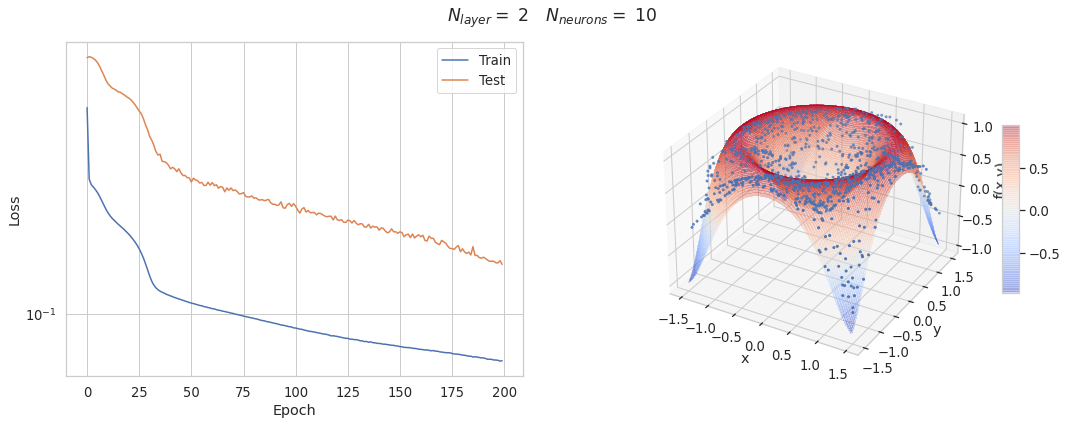

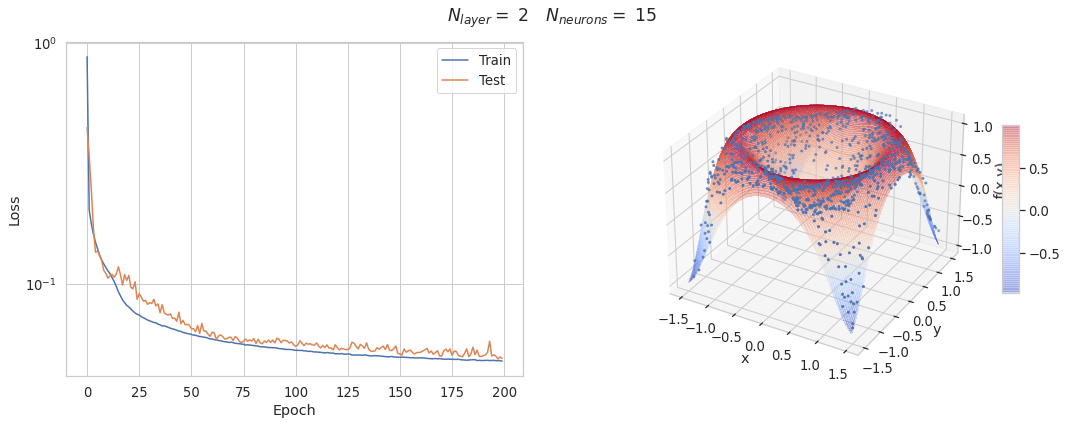

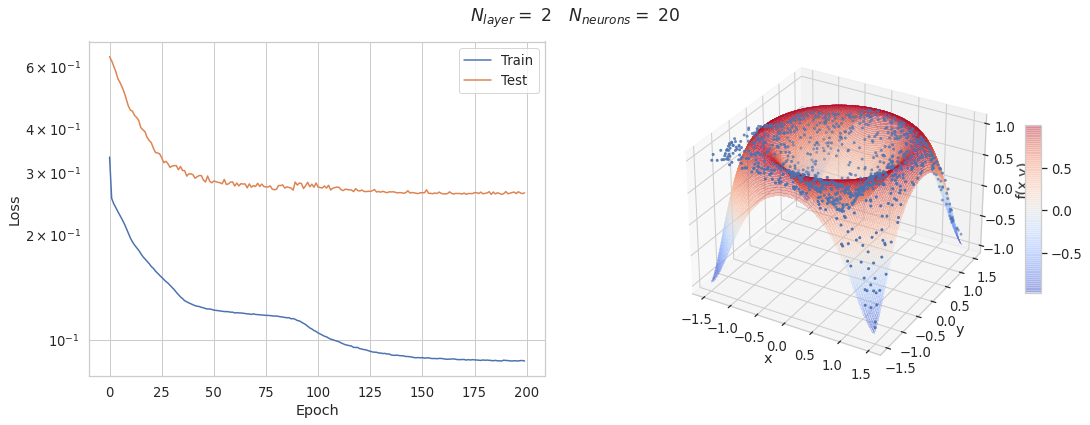

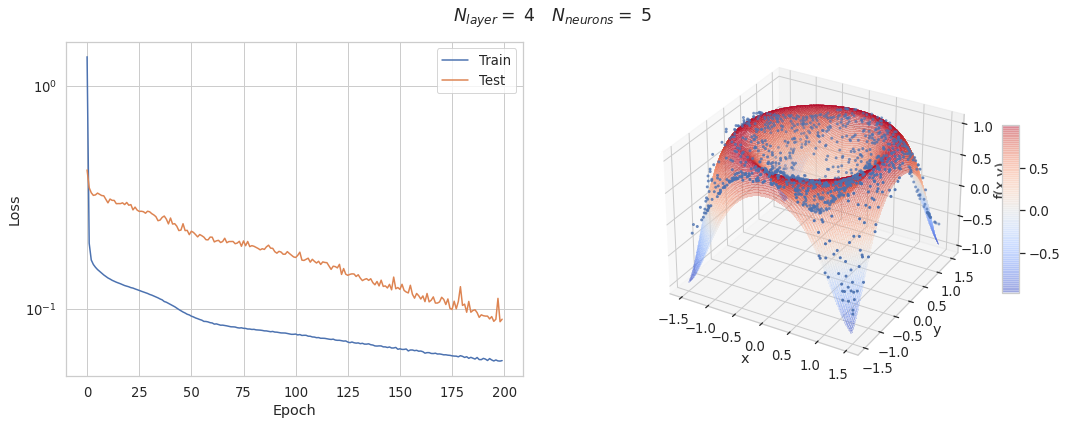

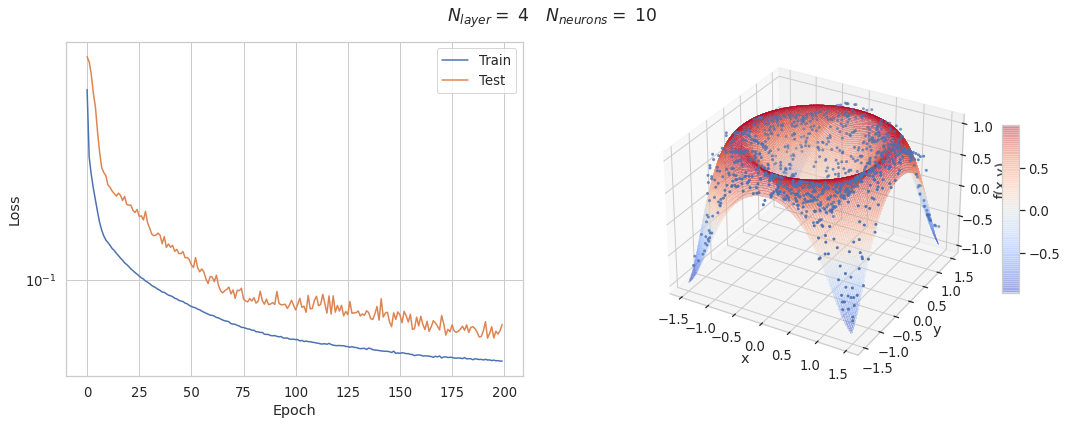

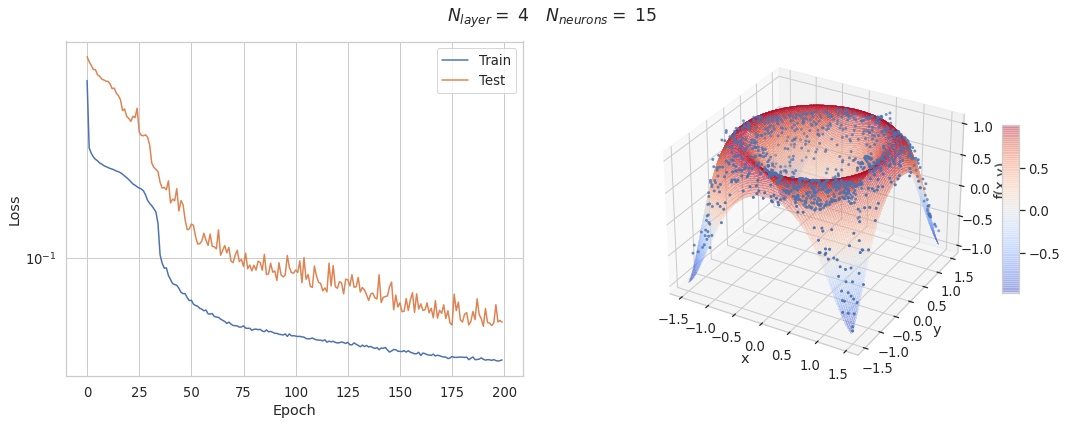

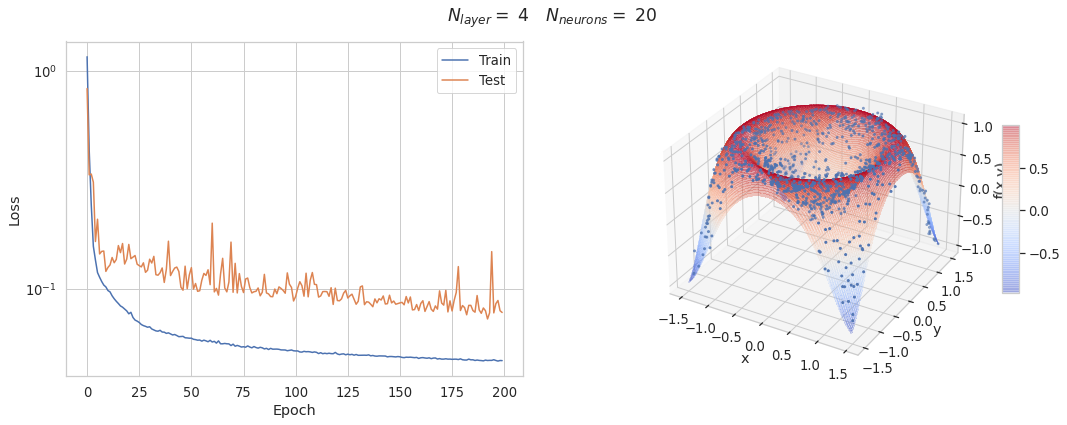

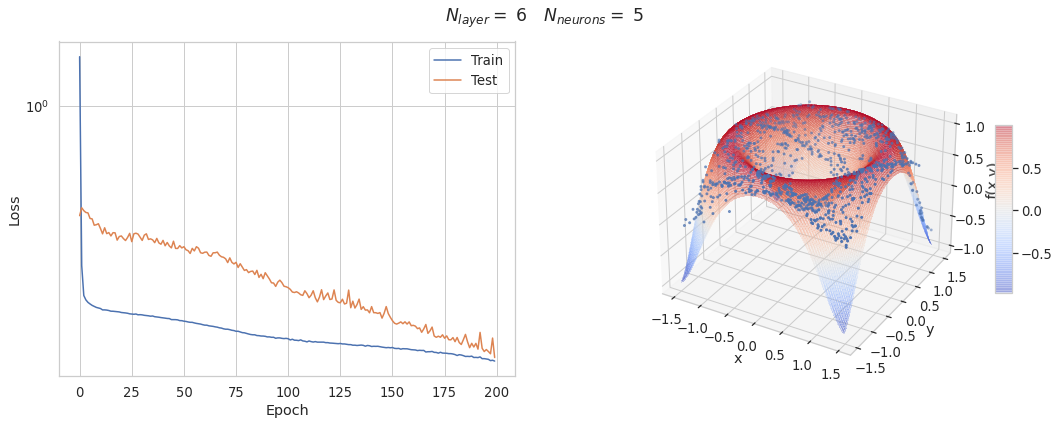

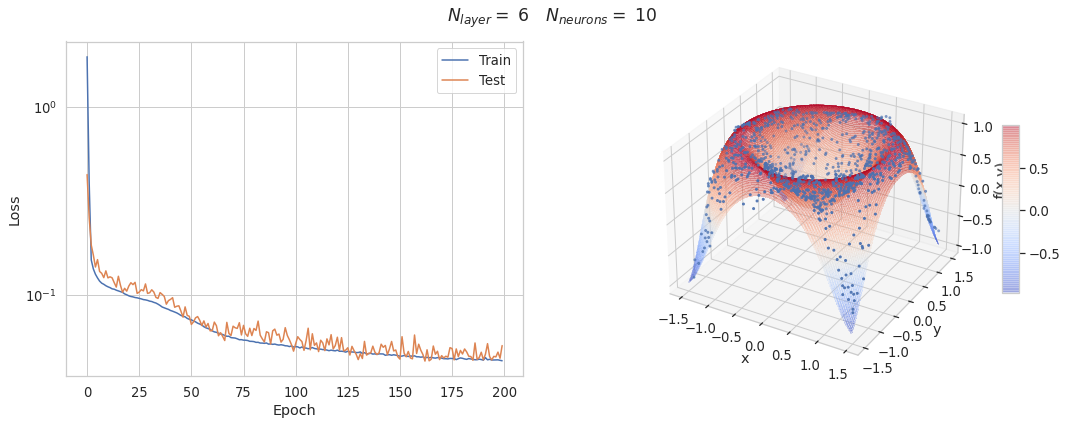

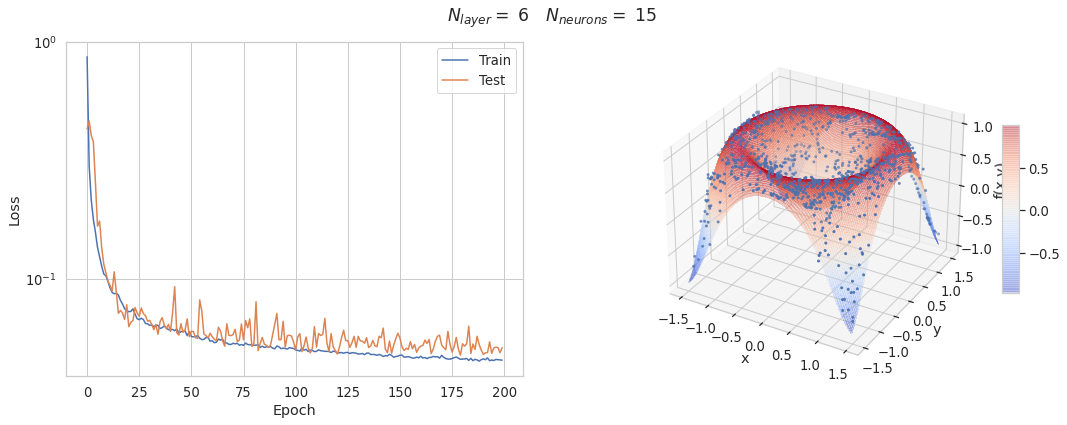

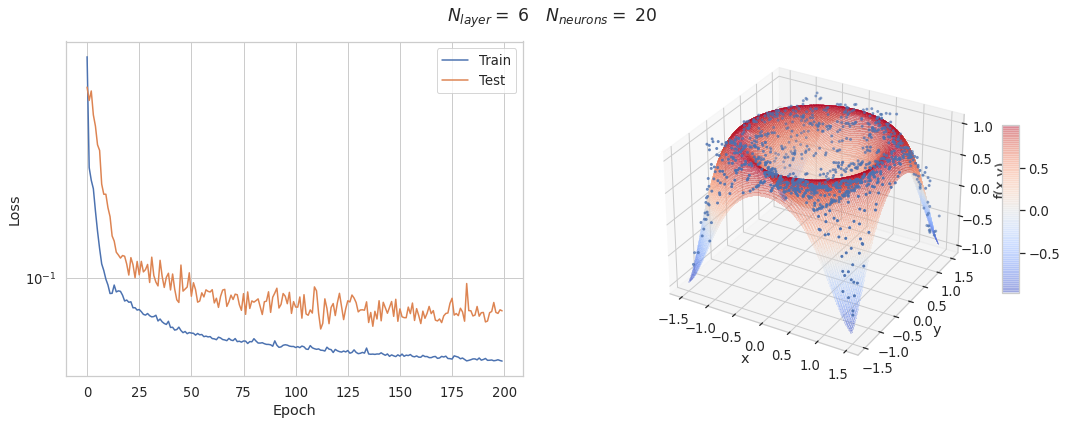

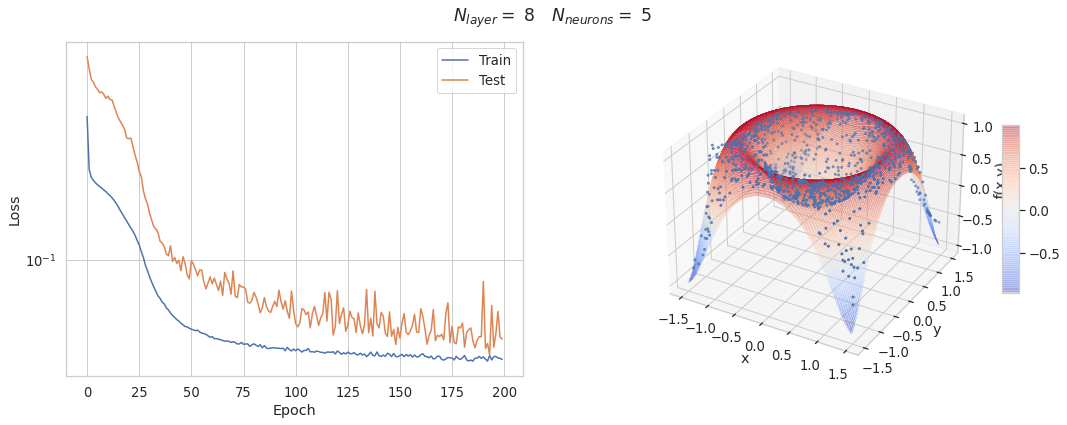

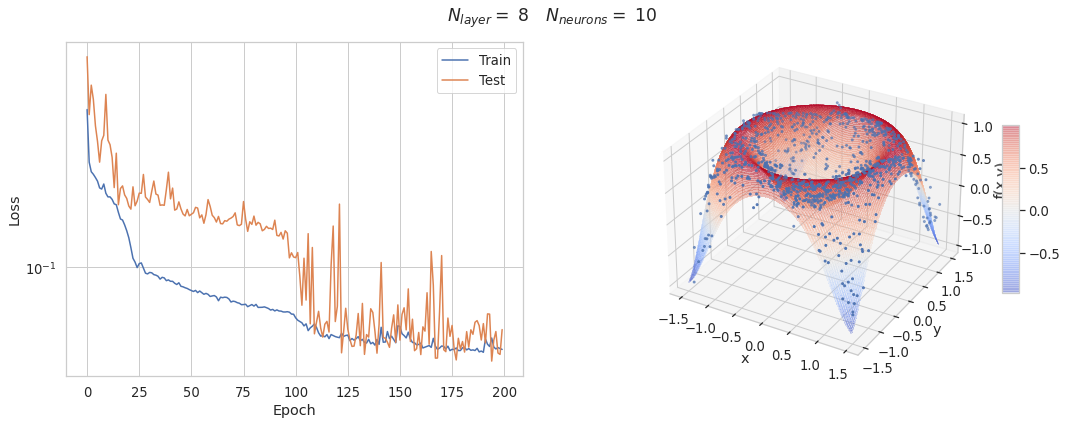

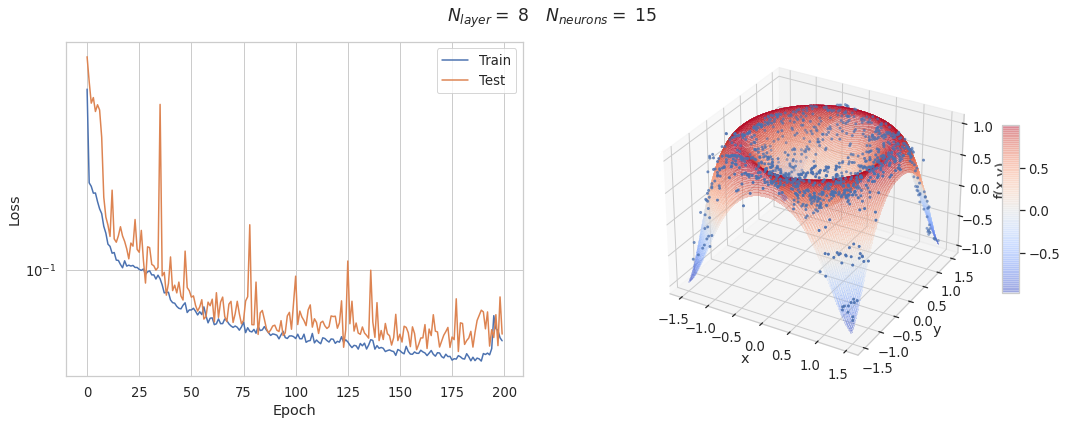

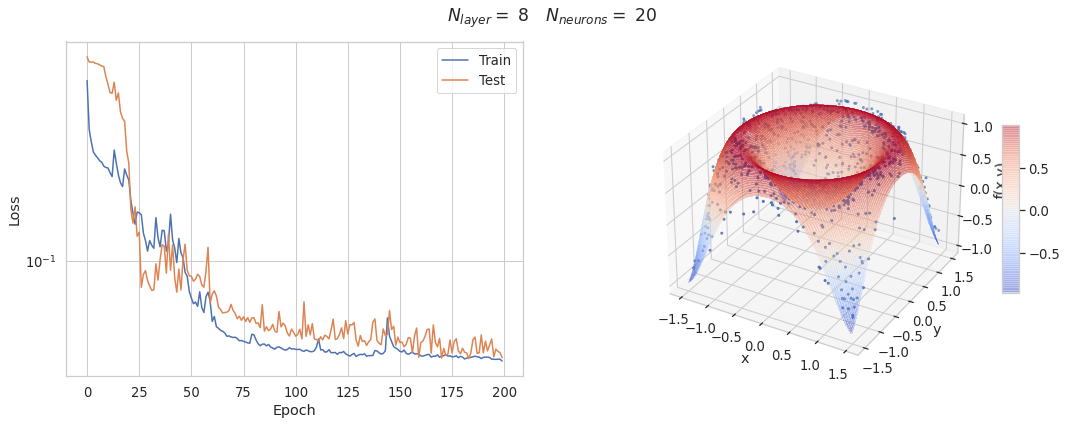

In [21]:
m=0
for i in n_layer:
    for j in n_neuron:        
        model, history = machine_learning(activation[0], n_epochs[0], n_train[0] , i, j, optimizer[0], loss[0])
        fig = plt.figure(figsize=(18,6))
        plt.suptitle(r'$N_{layer}=$ '+str(i)+r'$ \quad N_{neurons} =$ '+str(j))
        fig.subplots_adjust(top=0.9)

        ax = fig.add_subplot(1, 2, 1)
        ax.plot(history.history['loss'])
        ax.plot(history.history['val_loss'])
        ax.set_ylabel('Loss')
        ax.set_xlabel('Epoch')
        ax.set_yscale('log')
        ax.legend(['Train', 'Test'], loc='best')

        ax = fig.add_subplot(1, 2, 2, projection='3d')
        X = np.arange(-1.5, 1.5, 0.02)
        Y = np.arange(-1.5, 1.5, 0.02)
        X, Y = np.meshgrid( X,  Y)
        R = X**2 + Y**2
        Z = np.sin(R)
        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm',
                               linewidth=0, antialiased=False, alpha=0.2)

        ax.scatter(x1_predicted,x2_predicted, model.predict(array_to_predicted), marker='o', s=4)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel(r'f(x,y)')
        fig.colorbar(surf, shrink=0.5, aspect=10)

Osserviamo che aumentare $N_{layers}$ e $N_{neurons}$ non consenta di ottenere risultati migliori. Pertanto la configurazione ottimale della rete è: 

$$ \boxed{\text{Funzione di attivazione: selu} \quad \quad N_{epochs} = 200 \quad \quad N_{train} = 2000 \quad \quad N_{layers}=6 \quad \quad N_{neurons}=10}$$

## 4. Funzioni di ottimizzazione e di loss

In [23]:
activation = ['tanh']
n_epochs = [500]
n_train = [1500]
n_neuron = [10]
n_layer = [6]
optimizer = ['sgd','adam']
loss = ['mse','binary_crossentropy']


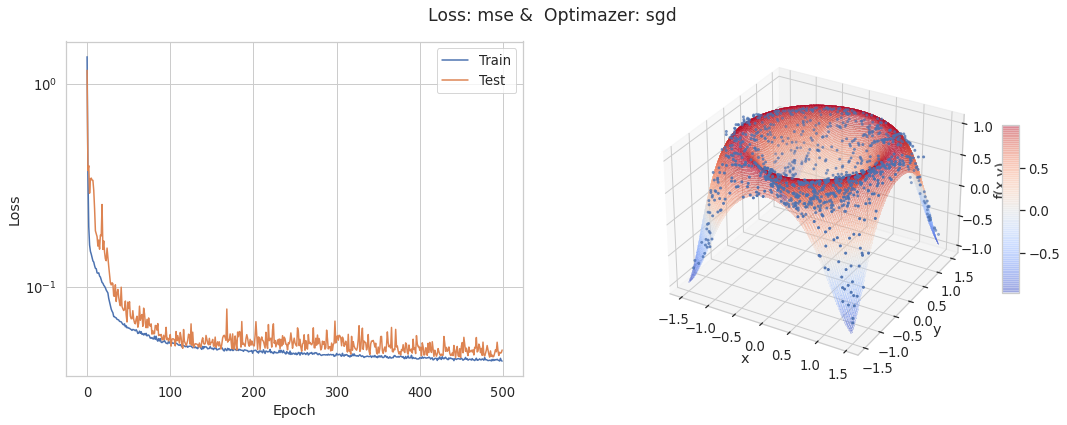

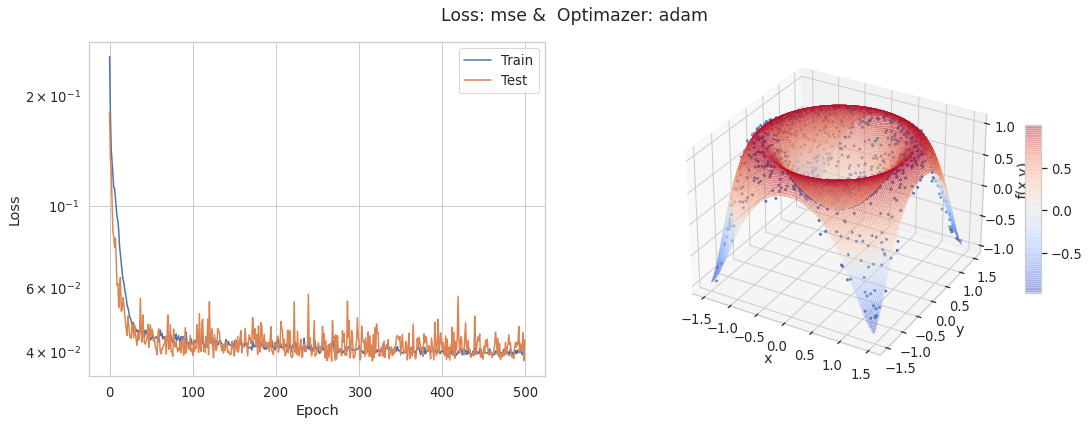

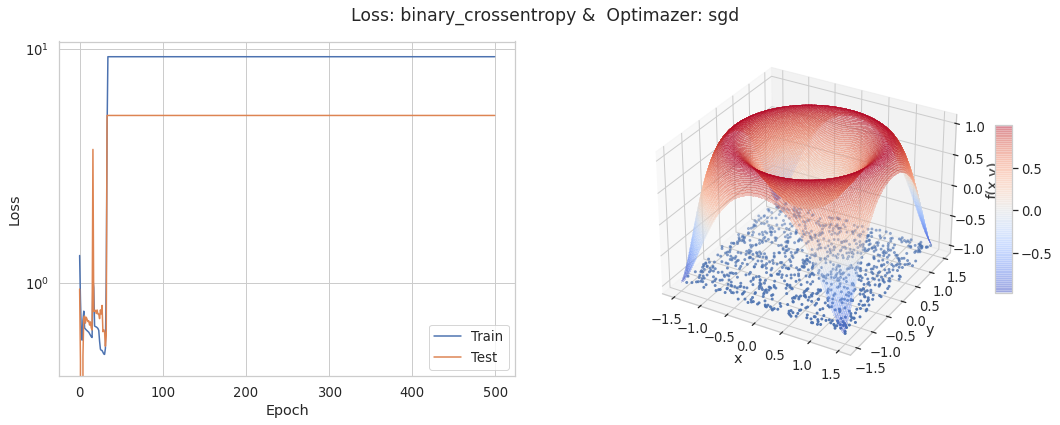

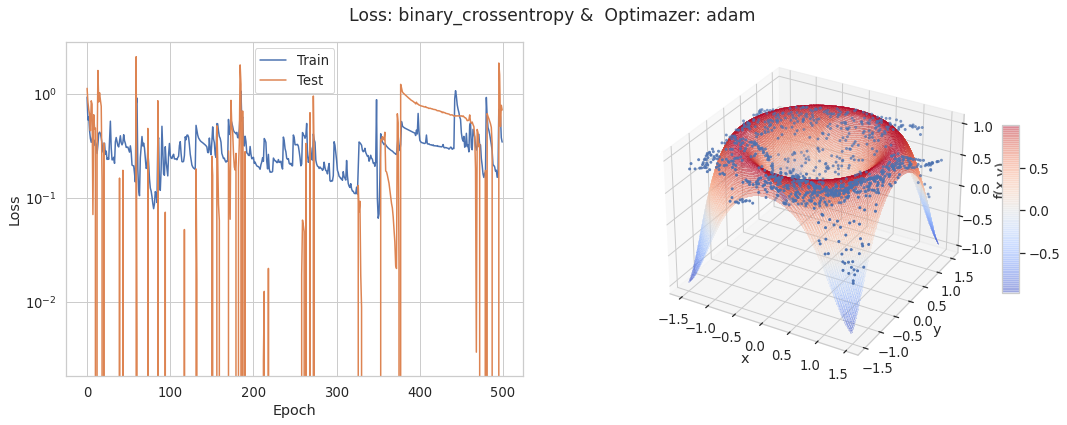

In [25]:
for f in loss:
    for h in optimizer:
        model, history = machine_learning(activation[0], n_epochs[0], n_train[0] , n_layer[0], n_neuron[0], h, f)
        fig = plt.figure(figsize=(18,6))
        plt.suptitle('Loss: '+str(f)+' &  Optimazer: '+str(h))
        fig.subplots_adjust(top=0.9)

        ax = fig.add_subplot(1, 2, 1)
        ax.plot(history.history['loss'])
        ax.plot(history.history['val_loss'])
        ax.set_ylabel('Loss')
        ax.set_xlabel('Epoch')
        ax.set_yscale('log')
        ax.legend(['Train', 'Test'], loc='best')

        ax = fig.add_subplot(1, 2, 2, projection='3d')
        X = np.arange(-1.5, 1.5, 0.02)
        Y = np.arange(-1.5, 1.5, 0.02)
        X, Y = np.meshgrid( X,  Y)
        R = X**2 + Y**2
        Z = np.sin(R)
        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm',
                               linewidth=0, antialiased=False, alpha=0.2)

        ax.scatter(x1_predicted,x2_predicted, model.predict(array_to_predicted), marker='o', s=4)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel(r'f(x,y)')
        fig.colorbar(surf, shrink=0.5, aspect=10)

Vediamo chiaramente che tra le due funzione di loss utilizzate, l'unica ragionevole è l'mse mentre per quanto la funzione di ottimizzazione migliore è quella adam. Infatti vediamo che porta ad un loss molto inferiore rispetto al sgd. In conclusione la rete neurale ottimale per fittare questa funzione è: 


$$ \boxed{\text{Funzione di attivazione: selu} \quad \quad \text{Funzione di loss: mse} \quad \quad \text{Funzione di ottimizzazione: adam}} $$
$$\boxed{\quad \quad N_{epochs} = 200 \quad \quad N_{train} = 2000 \quad \quad N_{layers}=6 \quad \quad N_{neurons}=10  }$$